<a href="https://colab.research.google.com/github/brunalves00/brunalves00/blob/main/Case_Starlink_HughesNet.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

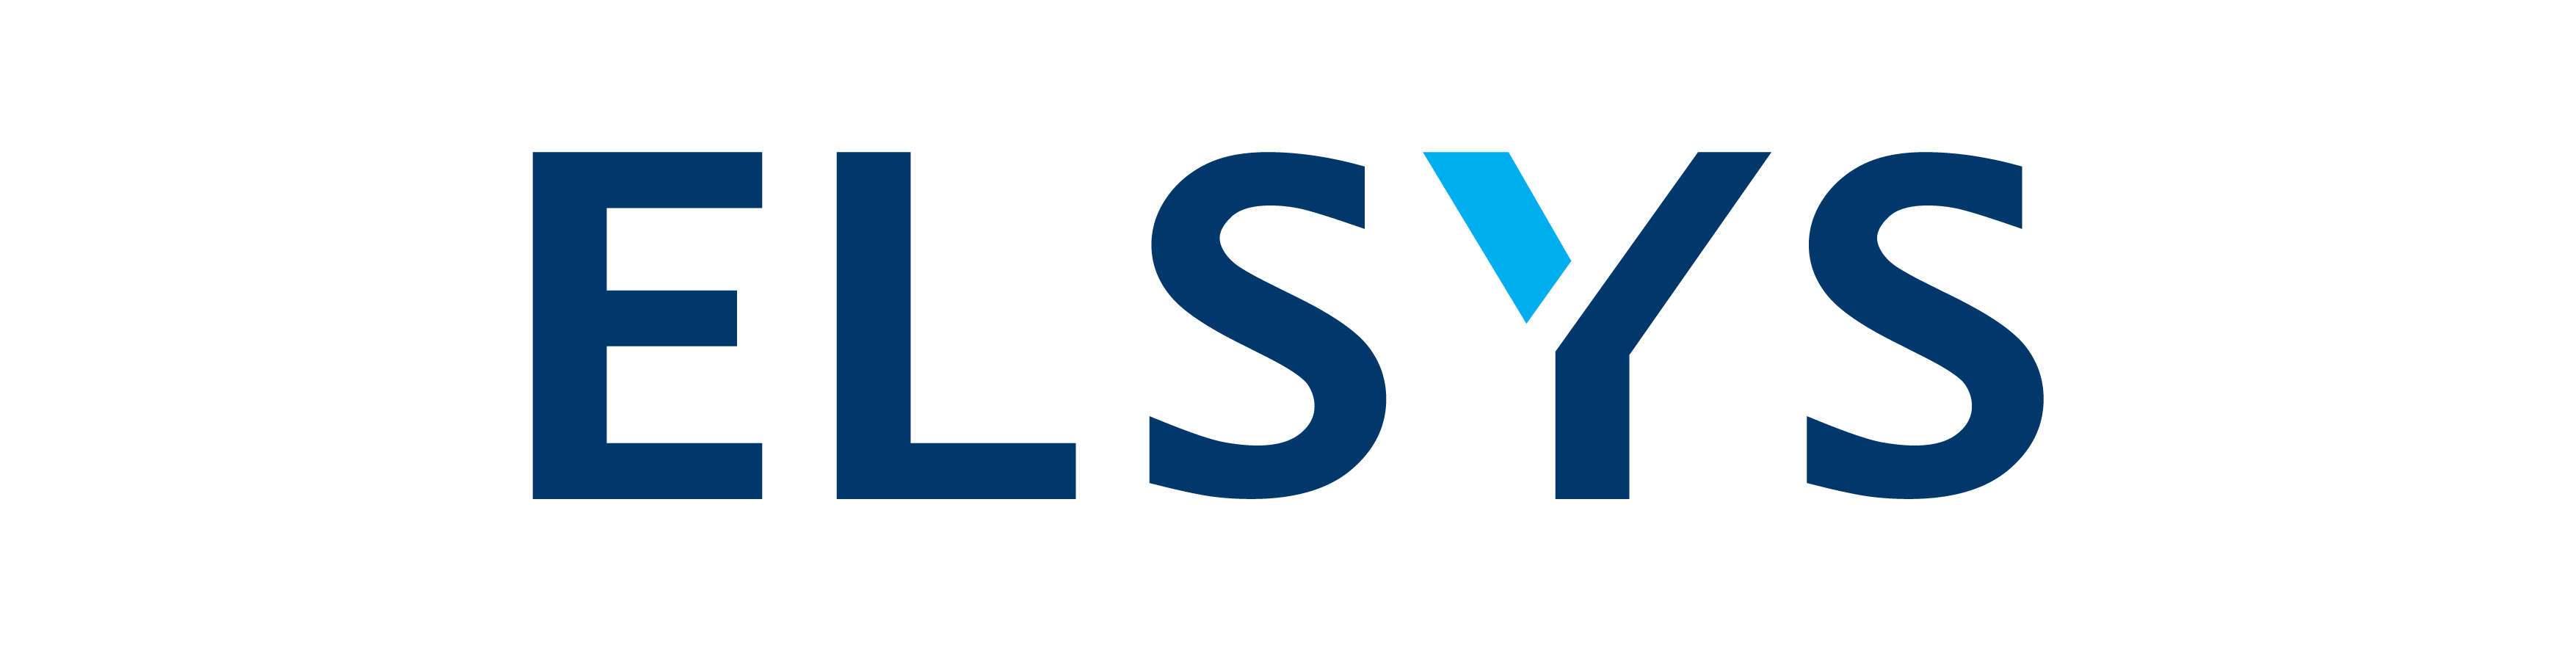
# 📌 **Índice**
1. Introdução e objetivos
2. Importação das bibliotecas e dos dados
3. Tratamento inicial e ajustes
4. Exploração dos dados
5. Análise do crescimento dos assinantes
6. Análise por região e velocidade
7. Participação de mercado
8. Previsão dos próximos 3 meses
9. Impacto das faixas de velocidade
10. Análise geográfica: As 10 cidades com maior crescimento
11. Sazonalidade e comportamento mensal
12. Competição direta por região
13. Insights e Conclusões
14. Exportação CSV para Power BI


## 🚀 **1. Introdução e Objetivos**
As operadoras **Starlink** e **HughesNet** buscam entender o comportamento da base de assinantes para planejamento comercial e análise competitiva. Os objetivos são:

- Avaliar crescimento da base
- Prever assinantes próximos meses
- Avaliar impacto da concorrência

Gerar insights estratégicos com análises detalhadas.

## 📦 **2. Importação das bibliotecas e dados**

In [4]:
# Instalando bibliotecas
!pip install openpyxl matplotlib seaborn pandas scikit-learn

# Importando bibliotecas
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression

# Carregando os dados
df = pd.read_excel('Dataset.xlsx')
df.head()

,Ano Mês,Base Assinantes Banda Larga,Cidade,Estado,Nome Operadora,Tecnologia,Velocidade
0,2024/06,0,Abadia de Goiás,GO,HUGHES TELECOMUNICACOES DO BRASIL LTDA,VSAT,> 34Mbps
1,2024/06,6,Abadia de Goiás,GO,HUGHES TELECOMUNICACOES DO BRASIL LTDA,VSAT,12Mbps a 34Mbps
2,2024/06,8,Abadia de Goiás,GO,HUGHES TELECOMUNICACOES DO BRASIL LTDA,VSAT,2Mbps a 12Mbps
3,2024/06,2,Abadia de Goiás,GO,HUGHES TELECOMUNICACOES DO BRASIL LTDA,VSAT,512kbps a 2Mbps
4,2024/06,31,Abadia de Goiás,GO,STARLINK BRAZIL SERVICOS DE INTERNET LTDA.,VSAT,> 34Mbps


## ⚙️ **3. Tratamento inicial e ajustes**

In [40]:
# Ajustando nomes das operadoras
df['Nome Operadora'] = df['Nome Operadora'].replace({
    'STARLINK BRAZIL SERVICOS DE INTERNET LTDA.': 'STARLINK',
    'HUGHES TELECOMUNICACOES DO BRASIL LTDA': 'HUGHESNET'
})

# Mapeando regiões
regioes = {
    'Norte': ['AC', 'AP', 'AM', 'PA', 'RO', 'RR', 'TO'],
    'Nordeste': ['AL', 'BA', 'CE', 'MA', 'PB', 'PE', 'PI', 'RN', 'SE'],
    'Centro-Oeste': ['DF', 'GO', 'MT', 'MS'],
    'Sudeste': ['ES', 'MG', 'RJ', 'SP'],
    'Sul': ['PR', 'RS', 'SC']
}

def definir_regiao(estado):
    for regiao, estados in regioes.items():
        if estado in estados:
            return regiao

df['Regiao'] = df['Estado'].apply(definir_regiao)

# Formatando mês/ano
df['AnoMes'] = pd.to_datetime(df['Ano Mês'])
df['Mes_Formatado'] = df['AnoMes'].dt.strftime('%b/%Y').str.upper()
ultimo_mes = df['AnoMes'].iloc[-1]
df_ultimo = df[df['AnoMes'] == ultimo_mes]
# Ordenar por data
df.sort_values('AnoMes', inplace=True)
df.head()

<ipython-input-40-1d33ec2356b2>:24: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df['AnoMes'] = pd.to_datetime(df['Ano Mês'])


,Ano Mês,Base Assinantes Banda Larga,Cidade,Estado,Nome Operadora,Tecnologia,Velocidade,Regiao,AnoMes,Mes_Formatado,Mes_Num
0,2024/06,0,Abadia de Goiás,GO,HUGHESNET,VSAT,> 34Mbps,Centro-Oeste,2024-06-01,JUN/2024,739038
50772,2024/06,0,Ipiaçu,MG,HUGHESNET,VSAT,512kbps a 2Mbps,Sudeste,2024-06-01,JUN/2024,739038
50868,2024/06,10,Ipirá,BA,HUGHESNET,VSAT,2Mbps a 12Mbps,Nordeste,2024-06-01,JUN/2024,739038
50869,2024/06,0,Ipirá,BA,HUGHESNET,VSAT,512kbps a 2Mbps,Nordeste,2024-06-01,JUN/2024,739038
50870,2024/06,6,Ipirá,BA,STARLINK,VSAT,> 34Mbps,Nordeste,2024-06-01,JUN/2024,739038


## 🔍 **4. Exploração dos dados**

In [28]:
#Visão geral
df.info()
df.describe(include='all')
#Quantas linhas há para cada operadora
print(df['Nome Operadora'].value_counts(), "\n")
#Total de assinantes (soma) por operadora
assinantes_por_operadora = (
    df.groupby('Nome Operadora')['Base Assinantes Banda Larga']
      .sum()                       # soma de assinantes
      .loc[['STARLINK', 'HUGHESNET']]  # garante ordem e filtra só as duas
)

print("Total de assinantes por operadora:")
print(assinantes_por_operadora)

<class 'pandas.core.frame.DataFrame'>
Index: 201592 entries, 0 to 132294
Data columns (total 11 columns):
 #   Column                       Non-Null Count   Dtype         
---  ------                       --------------   -----         
 0   Ano Mês                      201592 non-null  object        
 1   Base Assinantes Banda Larga  201592 non-null  int64         
 2   Cidade                       201592 non-null  object        
 3   Estado                       201592 non-null  object        
 4   Nome Operadora               201592 non-null  object        
 5   Tecnologia                   201592 non-null  object        
 6   Velocidade                   201592 non-null  object        
 7   Regiao                       201592 non-null  object        
 8   AnoMes                       201592 non-null  datetime64[ns]
 9   Mes_Formatado                201592 non-null  object        
 10  Mes_Num                      201592 non-null  int64         
dtypes: datetime64[ns](1), int64(2),

## 📈 **5. Análise do crescimento dos assinantes**

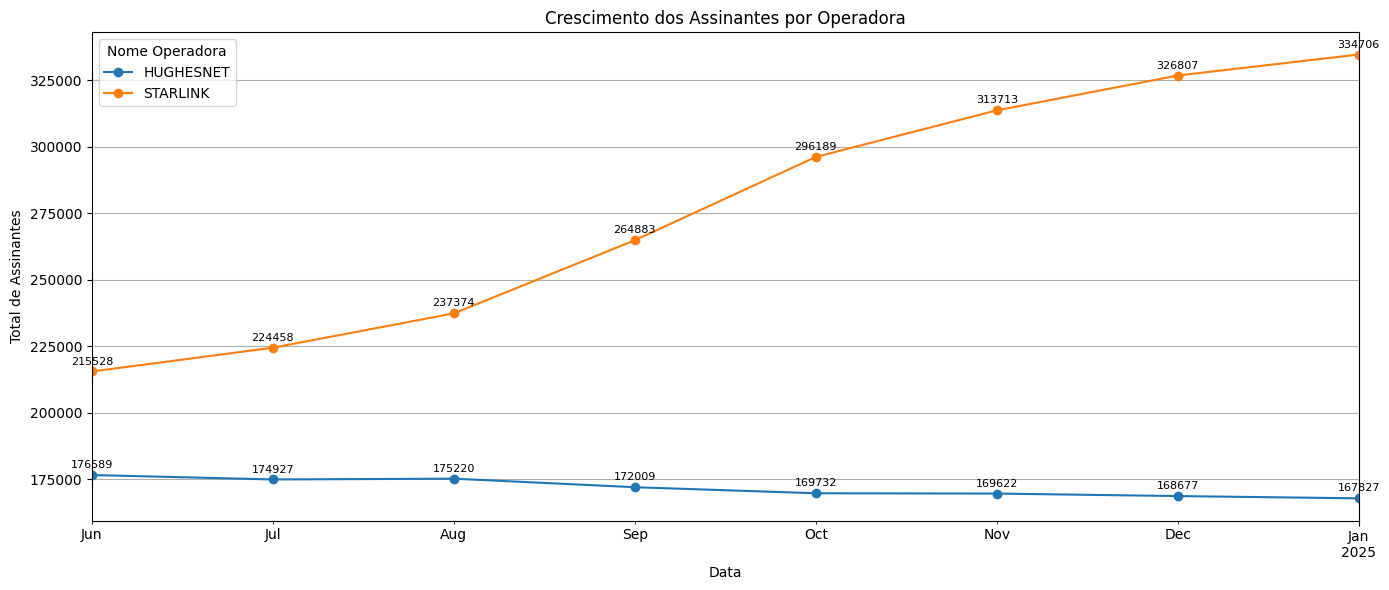

In [41]:
crescimento = df.groupby(['AnoMes', 'Nome Operadora'])['Base Assinantes Banda Larga'].sum().unstack()

# Plotar gráfico de linha - HISTÓRICO
ax = crescimento.plot(figsize=(14, 6), marker='o')
plt.title('Crescimento dos Assinantes por Operadora')
plt.ylabel('Total de Assinantes')
plt.xlabel('Data')
plt.grid(True)

# Adicionar valores sobre os pontos da linha
for operadora in crescimento.columns:
    for x, y in zip(crescimento.index, crescimento[operadora]):
        ax.annotate(f'{int(y)}', (x, y), textcoords="offset points", xytext=(0, 5), ha='center', fontsize=8)

plt.tight_layout()
plt.show()

## 🌎 **6. Análise por região e velocidade**

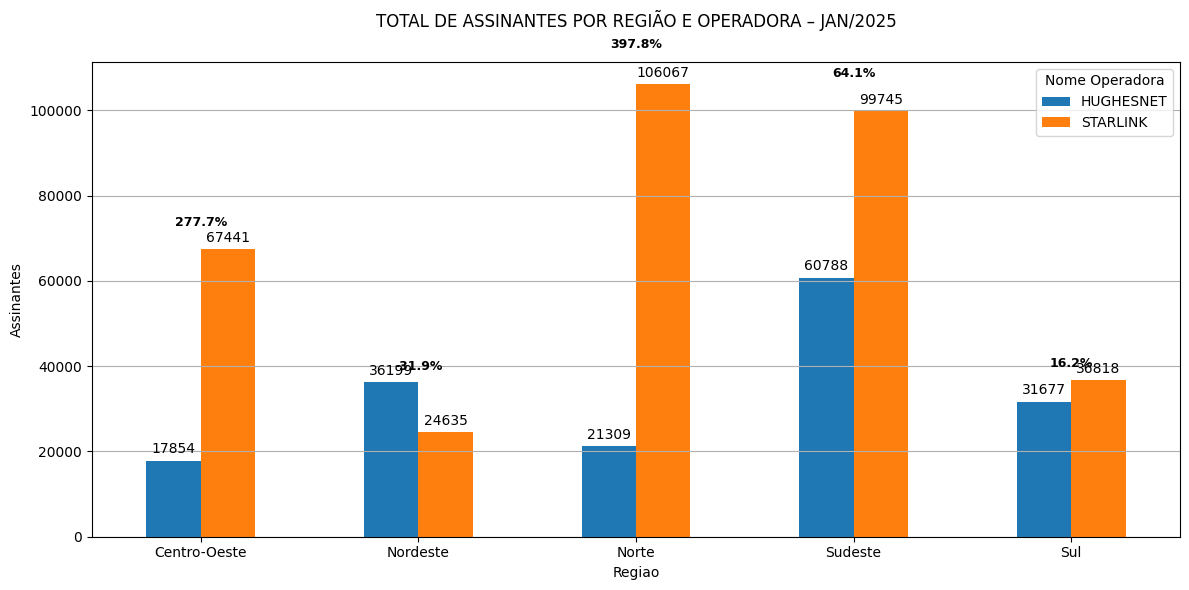

In [56]:
#Análise por Região
ultimo_mes = df['AnoMes'].max()          # Timestamp('2024-06-01'), corrigindo a formatação p analise, onde comentei com o Hiale sobre a formatação (vide topico 8)
df_ultimo  = df[df['AnoMes'] == ultimo_mes] #como padrao, mas no caso atual, está jan/2025.
                                            #com esse dataframe, se a base atualizasse e tivesse o mes de fevereiro, ele iria considerar tal como ultimo mes

regiao = (
    df_ultimo
      .groupby(['Regiao', 'Nome Operadora'])['Base Assinantes Banda Larga']
      .sum()
      .unstack()
)

ax1 = regiao.plot(kind='bar', figsize=(12, 6))
ax1.set_title(f'Total de Assinantes por Região e Operadora – {ultimo_mes:%b/%Y}'.upper(),
              pad=25)
ax1.set_ylabel('Assinantes')
ax1.grid(True, axis='y')

for c in ax1.containers:
    ax1.bar_label(c, fmt='%.0f', label_type='edge', padding=3)

pct_diff = (regiao['STARLINK'] - regiao['HUGHESNET']) / regiao['HUGHESNET'] * 100
for i, (reg, pct) in enumerate(pct_diff.items()):
    ax1.text(i, regiao.loc[reg].max() * 1.08, f'{pct:.1f}%',
             ha='center', fontweight='bold', fontsize=9)

ax1.set_xticklabels(regiao.index, rotation=0)
plt.tight_layout()
plt.show()


## 📊 **7. Participação de mercado**

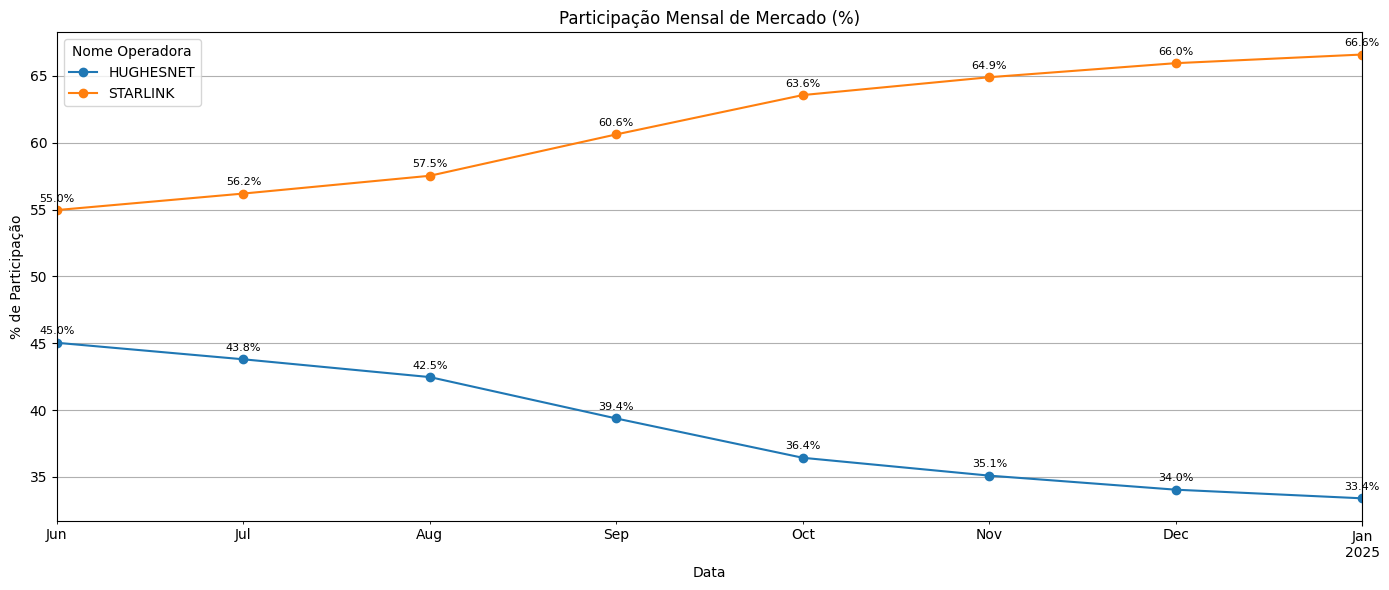

In [21]:
# Participação de mercado
total_mensal = df.groupby('AnoMes')['Base Assinantes Banda Larga'].sum()
participacao = df.groupby(['AnoMes', 'Nome Operadora'])['Base Assinantes Banda Larga'].sum().unstack()
participacao = participacao.div(total_mensal, axis=0) * 100

# Plotando gráfico
ax = participacao.plot(figsize=(14, 6), marker='o')
plt.title('Participação Mensal de Mercado (%)')
plt.ylabel('% de Participação')
plt.xlabel('Data')
plt.grid(True)

# Adicionar os valores sobre os pontos
for operadora in participacao.columns:
    for x, y in zip(participacao.index, participacao[operadora]):
        ax.annotate(f'{y:.1f}%', (x, y), textcoords="offset points", xytext=(0, 6), ha='center', fontsize=8)

plt.tight_layout()
plt.show()

#(assinantes operadora mes/tot assinantes mes) * 100

## 🔮 **8. Previsão dos Próximos 3 Meses**

/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


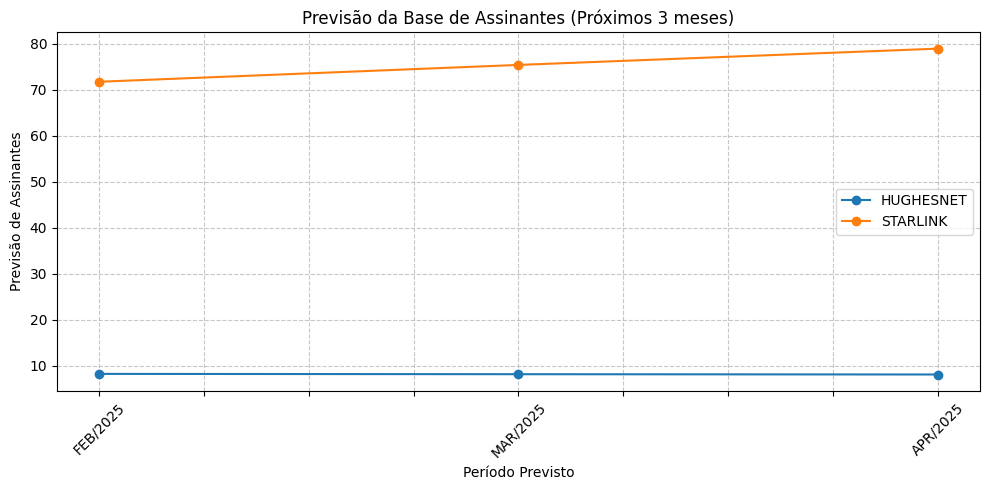

          HUGHESNET  STARLINK
FEB/2025       8.27     71.74
MAR/2025       8.20     75.40
APR/2025       8.14     78.95


In [31]:
# Coluna numérica para datas
df['Mes_Num'] = df['AnoMes'].map(pd.Timestamp.toordinal)

# Última data do histórico - atual Jan/2025, mas se a base atualizasse, seria Fev/2025, etc...
ultima_data = df['AnoMes'].max() #Hiale, eu disse que tinha usado por aqui!!! mas tava tao nervosa que nao achei :(

# Gerar datas futuras (próximos 3 meses)
futuras_datas = pd.date_range(ultima_data + pd.DateOffset(months=1), periods=3, freq='ME')
futuras_datas_ordinais = futuras_datas.map(pd.Timestamp.toordinal).to_numpy().reshape(-1, 1)

# DataFrame para armazenar previsões claramente
previsoes_df = pd.DataFrame(index=futuras_datas.strftime('%b/%Y').str.upper())

# Treinar modelo e prever para cada operadora
for op in df['Nome Operadora'].unique():
    modelo = LinearRegression()
    temp_df = df[df['Nome Operadora'] == op]

    X = temp_df[['Mes_Num']]
    y = temp_df['Base Assinantes Banda Larga']
    modelo.fit(X, y)

    # Fazer previsões usando futuros períodos
    previsao = modelo.predict(futuras_datas_ordinais)
    previsoes_df[op] = previsao

# Plotar gráfico das previsões (3 meses)
plt.figure(figsize=(10, 5))
previsoes_df.plot(marker='o', ax=plt.gca())

plt.title('Previsão da Base de Assinantes (Próximos 3 meses)')
plt.xlabel('Período Previsto')
plt.ylabel('Previsão de Assinantes')
plt.grid(True, linestyle='--', alpha=0.7)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Mostrar previsões detalhadas
print(previsoes_df.round(2))

## 📡 **9. Impacto das faixas de velocidade**


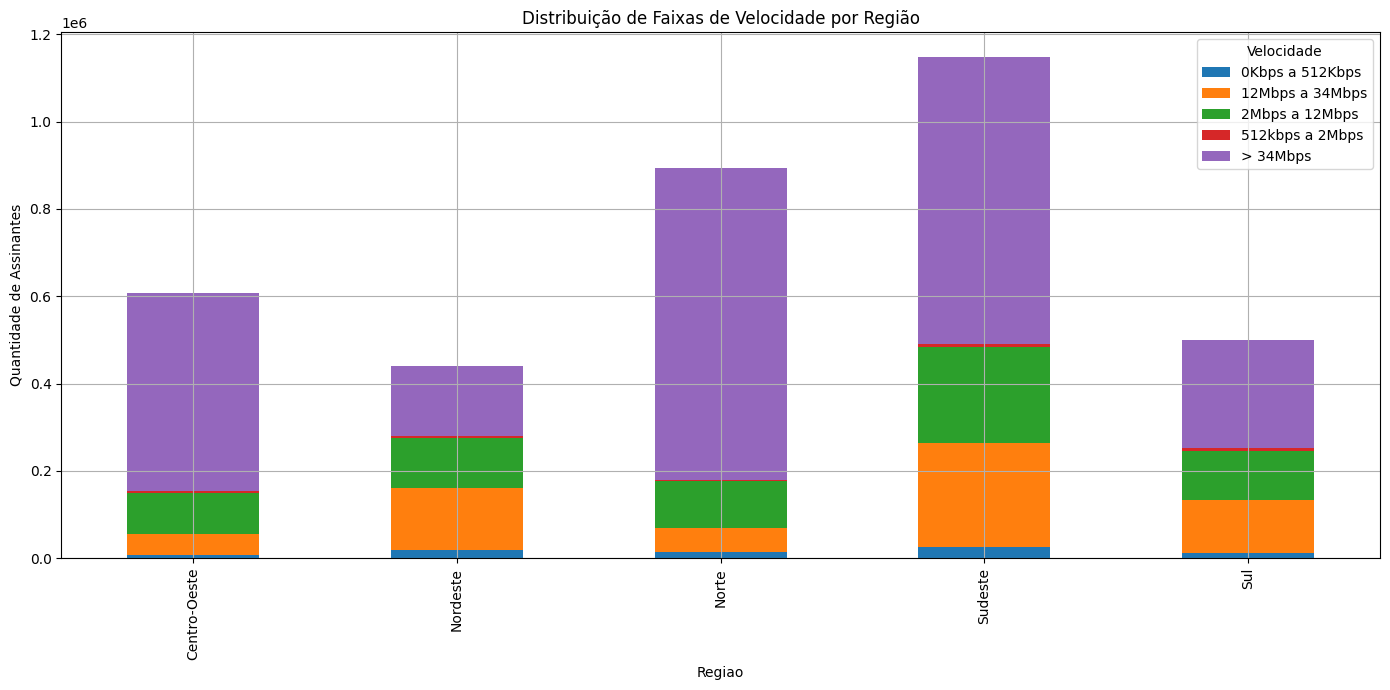

In [32]:
velocidade_regiao = df.pivot_table(
    index='Regiao',
    columns='Velocidade',
    values='Base Assinantes Banda Larga',
    aggfunc='sum'
).fillna(0)
velocidade_regiao.plot(kind='bar', stacked=True, figsize=(14, 7))
plt.title('Distribuição de Faixas de Velocidade por Região')
plt.ylabel('Quantidade de Assinantes')
plt.grid(True)
plt.tight_layout()
plt.show()


## 🗺️ **10. Análise Geográfica: As 10 cidades com maior crescimento**

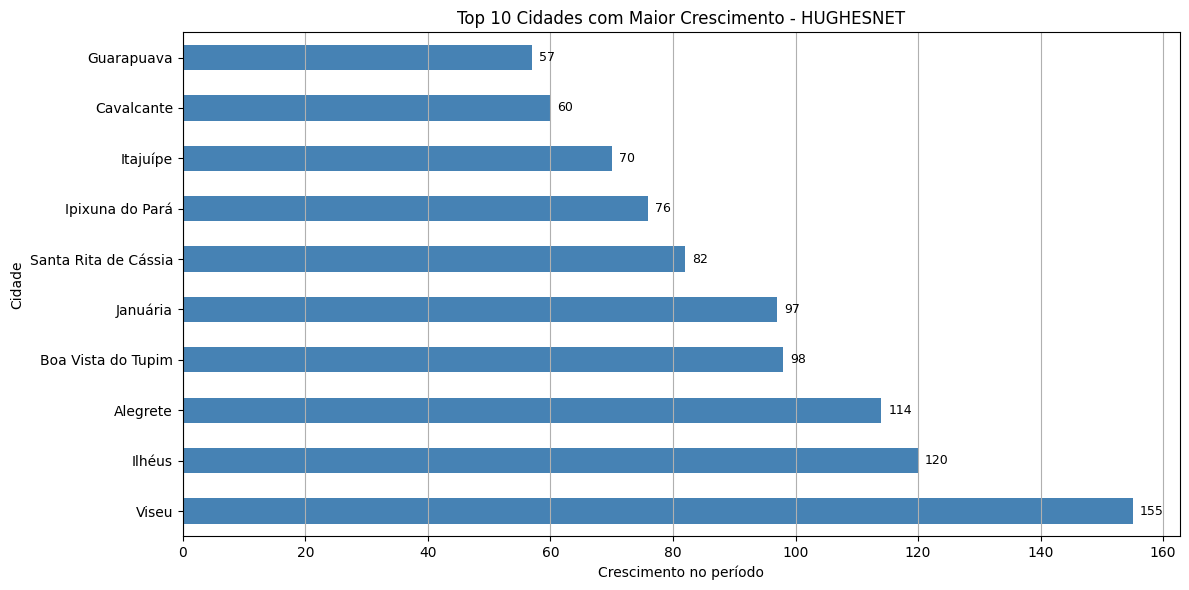

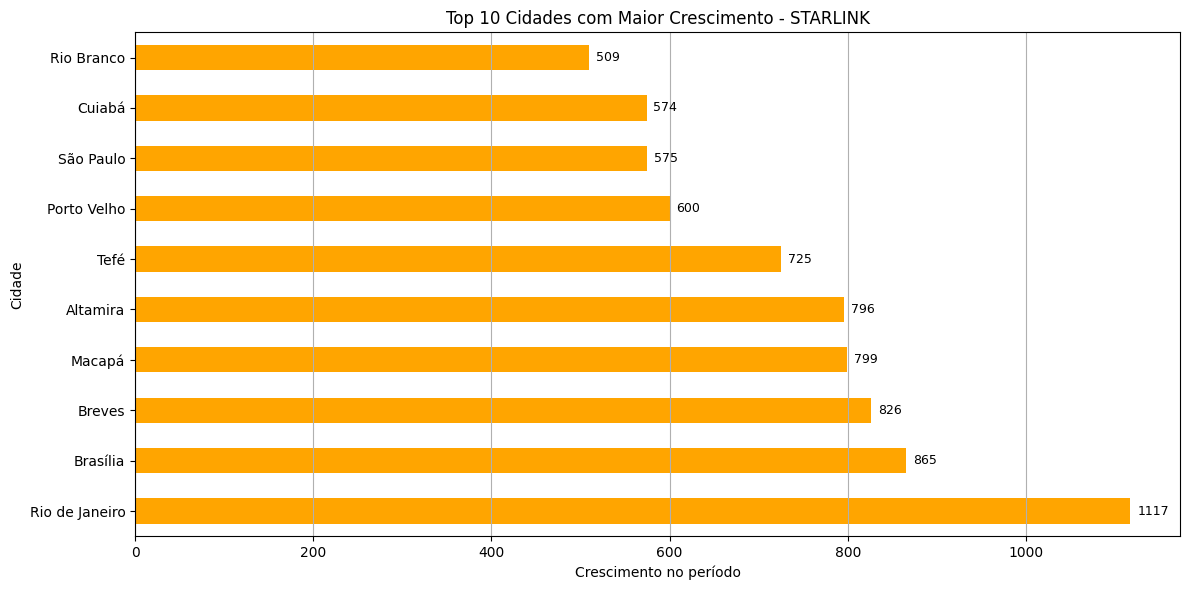

In [33]:
operadoras = df['Nome Operadora'].unique()

for op in operadoras:
    # Filtrar por operadora
    df_op = df[df['Nome Operadora'] == op]

    # Agrupar por cidade e data
    cidade_crescimento = df_op.groupby(['Cidade', 'AnoMes'])['Base Assinantes Banda Larga'].sum().unstack().fillna(0)

    # Calcular crescimento entre a primeira e última data
    cidade_crescimento['Crescimento'] = cidade_crescimento.iloc[:, -1] - cidade_crescimento.iloc[:, 0]

    # Top 10 cidades com maior crescimento
    top10 = cidade_crescimento['Crescimento'].nlargest(10)

    # Plot horizontal
    ax = top10.plot(kind='barh', figsize=(12, 6), color='orange' if op == 'STARLINK' else 'steelblue')
    plt.title(f'Top 10 Cidades com Maior Crescimento - {op}')
    plt.xlabel('Crescimento no período')
    plt.ylabel('Cidade')
    plt.grid(True, axis='x')

    # Adicionar os valores ao lado das barras
    for i, (valor, cidade) in enumerate(zip(top10.values, top10.index)):
        ax.annotate(f'{int(valor)}', xy=(valor, i), xytext=(5, 0), textcoords='offset points',
                    va='center', fontsize=9, color='black')

    plt.tight_layout()
    plt.show()

## 📆 **11. Sazonalidade e comportamento mensal**




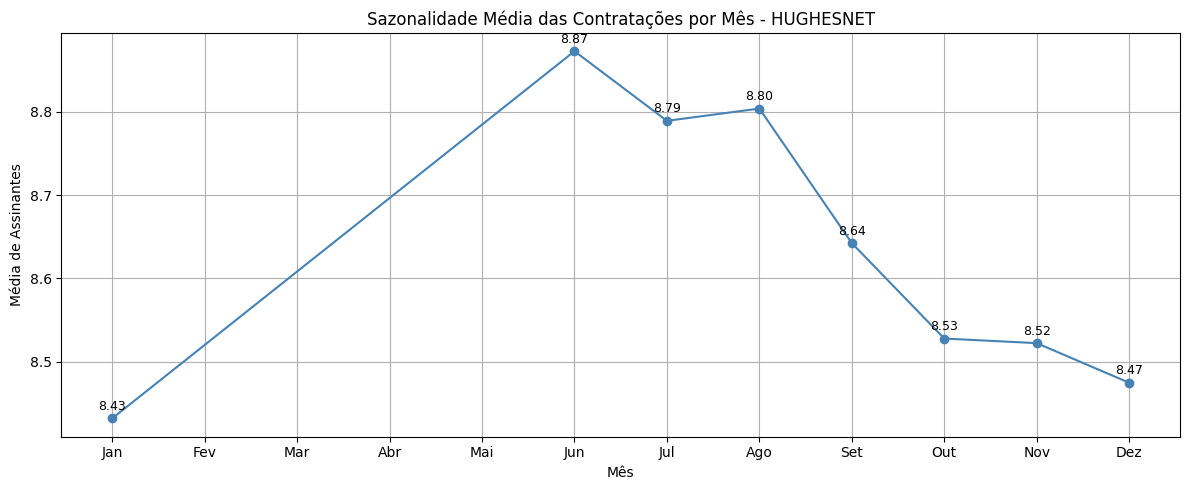

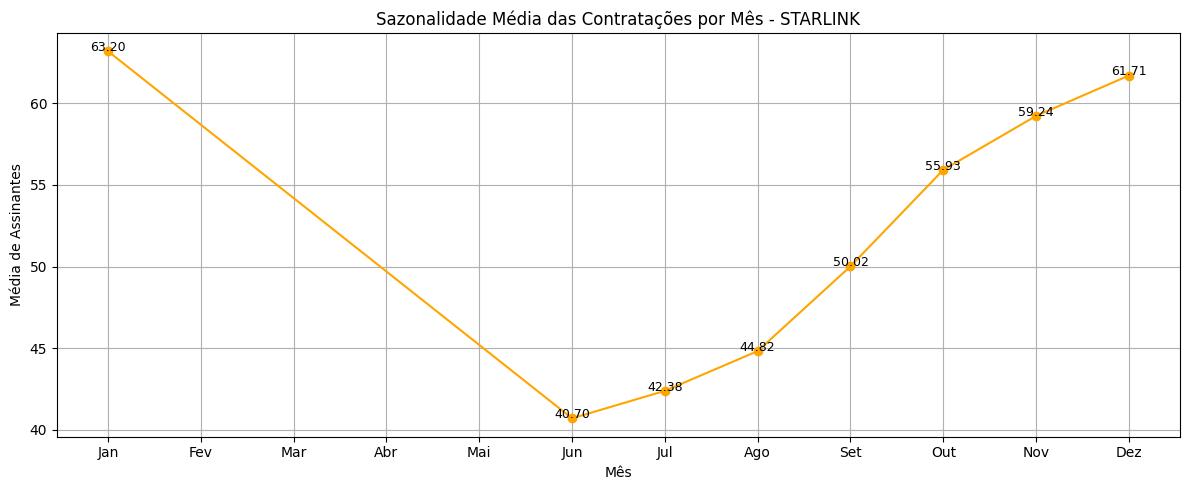

In [ ]:
for op in operadoras:
    df_op = df[df['Nome Operadora'] == op]

    # Agrupar e calcular média mensal
    sazonalidade = df_op.groupby('Mes')['Base Assinantes Banda Larga'].mean()

    # Plotar gráfico de linha
    plt.figure(figsize=(12, 5))
    plt.plot(sazonalidade.index, sazonalidade.values, marker='o',
             color='orange' if op == 'STARLINK' else 'steelblue')

    # Título e eixos
    plt.title(f'Sazonalidade Média das Contratações por Mês - {op}')
    plt.xlabel('Mês')
    plt.ylabel('Média de Assinantes')
    plt.xticks(ticks=range(1, 13),
               labels=['Jan', 'Fev', 'Mar', 'Abr', 'Mai', 'Jun',
                       'Jul', 'Ago', 'Set', 'Out', 'Nov', 'Dez'])

    # Adicionar valores formatados com 2 casas decimais
    for mes, valor in zip(sazonalidade.index, sazonalidade.values):
        plt.text(mes, valor + 0.01, f'{valor:.2f}', ha='center', fontsize=9)

    plt.grid(True)
    plt.tight_layout()
    plt.show()

## 🆚 **12. Competição direta por região**

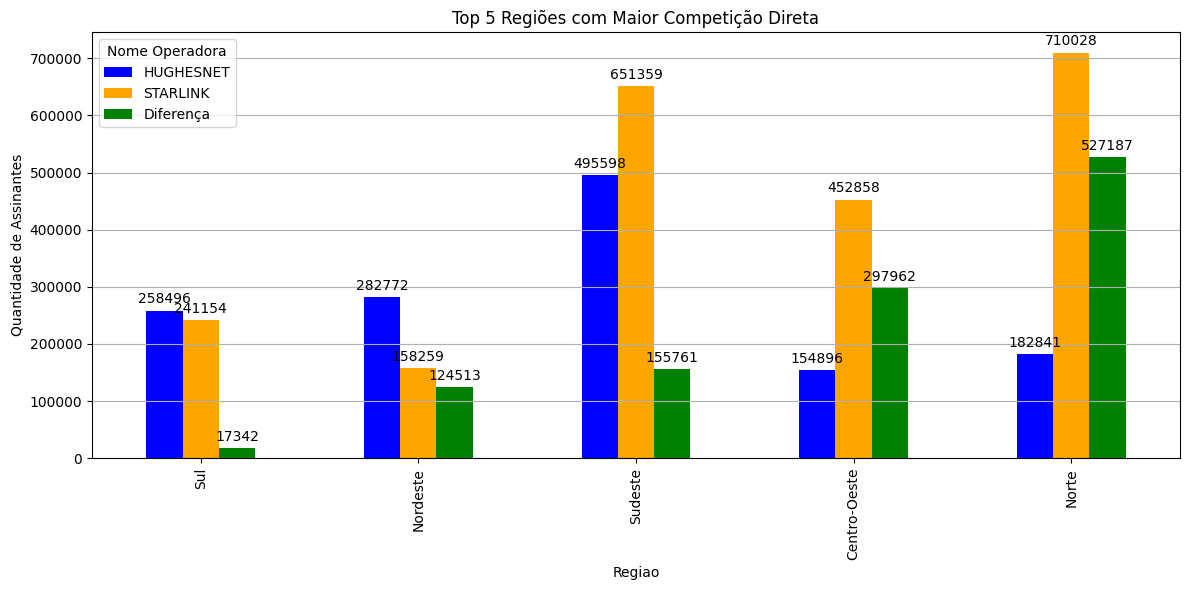

In [34]:
competicao = df.pivot_table(index='Regiao', columns='Nome Operadora', values='Base Assinantes Banda Larga', aggfunc='sum')
competicao['Diferença'] = abs(competicao['STARLINK'] - competicao['HUGHESNET'])

# Selecionar as 5 regiões com menor diferença (mais competição)
competicao_top5 = competicao.sort_values('Diferença').head(5)

# Plotar barras agrupadas com valores
ax = competicao_top5.plot(kind='bar', figsize=(12, 6), color=['blue', 'orange', 'green'])
plt.title('Top 5 Regiões com Maior Competição Direta')
plt.ylabel('Quantidade de Assinantes')
plt.grid(True, axis='y')

# Adicionar números sobre as barras
for container in ax.containers:
    ax.bar_label(container, fmt='%.0f', label_type='edge', padding=3)

plt.tight_layout()
plt.show()


## 🎯 **13. Insights e conclusões**
- Starlink com crescimento acelerado.
- HughesNet forte presença regional.
- Participação de mercado crescente da Starlink.
- Previsões indicam crescimento contínuo da Starlink nos próximos meses.

## 💾 **14. Exportação CSV para Power BI**

In [35]:
# Exportando dados tratados
df.to_csv('/content/dados_tratados.csv', index=False)

# 📥 Baixar automaticamente o CSV
from google.colab import files
files.download('/content/dados_tratados.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>